In [1]:
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings = False

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("../mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
X = df.drop("class", axis=1)
y = df["class"]

In [5]:
y.unique()

array(['p', 'e'], dtype=object)

## Encoding and scaling

In [6]:
X_encoded = pd.get_dummies(X, prefix_sep="_")
X_scaled = StandardScaler().fit_transform(X_encoded)
y_encoded = LabelEncoder().fit_transform(y)

## Model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.3,
                                                    random_state=101)

In [8]:
start = time.process_time()
model = RandomForestClassifier(n_estimators=700).fit(X_train, y_train)
print(time.process_time() - start)
preds = model.predict(X_test)

1.6648589999999999


In [10]:
cm = confusion_matrix(y_test, preds)
cr = classification_report(y_test, preds)

In [11]:
print(cm)

[[1274    0]
 [   0 1164]]


In [13]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## We had full precision and fully classified!
### Lets check if we can make it with less features

In [16]:
feat_imp = pd.Series(model.feature_importances_, index=X_encoded.columns)
feat_imp

cap-shape_b    0.002484
cap-shape_c    0.000074
cap-shape_f    0.000789
cap-shape_k    0.000419
cap-shape_s    0.000552
                 ...   
habitat_l      0.001266
habitat_m      0.002639
habitat_p      0.004005
habitat_u      0.008513
habitat_w      0.000997
Length: 117, dtype: float64

<AxesSubplot:>

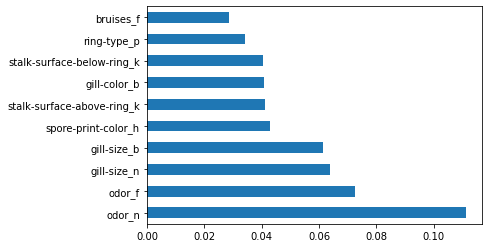

In [20]:
feat_imp.nlargest(10).plot(kind='barh')

## Getting the best 4 features

In [27]:
best_feat = list(feat_imp.nlargest(4).index)
best_feat

['odor_n', 'odor_f', 'gill-size_n', 'gill-size_b']

In [40]:
X_encoded_best = X_encoded[best_feat]
X_encoded_best

,odor_n,odor_f,gill-size_n,gill-size_b
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,1,0,0,1
...,...,...,...,...
8119,1,0,0,1
8120,1,0,0,1
8121,1,0,0,1
8122,0,0,1,0


In [41]:
X_scaled_best = StandardScaler().fit_transform(X_encoded_best)

## Another model with reduced features

In [42]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_scaled_best,
                                                       y_encoded,
                                                       test_size=0.3,
                                                       random_state=101)

In [43]:
start = time.process_time()
model2 = RandomForestClassifier(n_estimators=700).fit(Xb_train, yb_train)
print(time.process_time() - start)
preds2 = model2.predict(Xb_test)

1.0508939999999996


In [47]:
print(confusion_matrix(yb_test, preds2))

[[1248   26]
 [  53 1111]]


In [48]:
print(classification_report(yb_test, preds2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



## As seen just 3% change in precision but process time is dramatically reduced!!